In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-cases-and-deaths-worldwide/covid_worldwide.csv


## According to these data: `Total Cases`=`Total Deaths`+`Total Recovered`+ `Active Cases`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

In [3]:
covid=pd.read_csv('/kaggle/input/covid-cases-and-deaths-worldwide/covid_worldwide.csv')
covid.head()

Serial Number  Country  Total Cases Total Deaths Total Recovered  \
0              1      USA  104,196,861    1,132,935     101,322,779   
1              2    India   44,682,784      530,740      44,150,289   
2              3   France   39,524,311      164,233      39,264,546   
3              4  Germany   37,779,833      165,711      37,398,100   
4              5   Brazil   36,824,580      697,074      35,919,372   

  Active Cases     Total Test     Population  
0    1,741,147  1,159,832,679    334,805,269  
1        1,755    915,265,788  1,406,631,776  
2       95,532    271,490,188     65,584,518  
3      216,022    122,332,384     83,883,596  
4      208,134     63,776,166    215,353,593

In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


In [5]:
covid.shape

(231, 8)

In [6]:
covid['Total Cases']=covid['Total Cases'].str.replace(',','').astype(float)
covid['Total Deaths']=covid['Total Deaths'].str.replace(',','').astype(float)
covid['Total Recovered']=covid['Total Recovered'].str.replace(',','').astype(float)
covid['Active Cases']=covid['Active Cases'].str.replace(',','').astype(float)
covid['Total Test']=covid['Total Test'].str.replace(',','').astype(float)
covid['Population']=covid['Population'].str.replace(',','').astype(float)

In [7]:
covid.drop('Serial Number',axis=1,inplace=True)

In [8]:
covid.describe()

Total Cases  Total Deaths  Total Recovered  Active Cases  \
count  2.310000e+02  2.250000e+02     2.100000e+02  2.120000e+02   
mean   2.923460e+06  3.005778e+04     2.993905e+06  9.099885e+04   
std    9.479286e+06  1.053806e+05     9.520209e+06  7.663888e+05   
min    5.000000e+00  1.000000e+00     2.000000e+00  0.000000e+00   
25%    2.400100e+04  2.230000e+02     2.197250e+04  5.250000e+01   
50%    2.065920e+05  2.179000e+03     2.351455e+05  1.115000e+03   
75%    1.296146e+06  1.445200e+04     1.465768e+06  1.022875e+04   
max    1.041969e+08  1.132935e+06     1.013228e+08  1.095262e+07   

         Total Test    Population  
count  2.130000e+02  2.280000e+02  
mean   3.249316e+07  2.849326e+07  
std    1.177370e+08  1.022803e+08  
min    7.850000e+03  7.990000e+02  
25%    3.478150e+05  4.450815e+05  
50%    2.216193e+06  5.676382e+06  
75%    1.298426e+07  2.170759e+07  
max    1.159833e+09  1.406632e+09

In [9]:
100*covid.isnull().sum()/covid.shape[0]

Country            0.000000
Total Cases        0.000000
Total Deaths       2.597403
Total Recovered    9.090909
Active Cases       8.225108
Total Test         7.792208
Population         1.298701
dtype: float64

In [10]:
covid[covid['Population'].isnull()]

Country  Total Cases  Total Deaths  Total Recovered  \
90              China     503302.0        5272.0         379053.0   
226  Diamond Princess        712.0          13.0            699.0   
229        MS Zaandam          9.0           2.0              7.0   

     Active Cases   Total Test  Population  
90       118977.0  160000000.0         NaN  
226           0.0          NaN         NaN  
229           0.0          NaN         NaN

In [11]:
covid.loc[90,'Population']=1454053262
covid.loc[226,'Population']=2666
covid.loc[229,'Population']=2047

In [12]:
covid.dropna(subset=['Total Recovered'],inplace=True)

In [13]:
100*covid.isnull().sum()/covid.shape[0]

Country            0.000000
Total Cases        0.000000
Total Deaths       1.904762
Total Recovered    0.000000
Active Cases       0.000000
Total Test         6.190476
Population         0.000000
dtype: float64

In [14]:
covid['Total Test'].fillna(0,inplace=True)
covid['Total Deaths'].fillna(0,inplace=True)

In [15]:
100*covid.isnull().sum()/covid.shape[0]

Country            0.0
Total Cases        0.0
Total Deaths       0.0
Total Recovered    0.0
Active Cases       0.0
Total Test         0.0
Population         0.0
dtype: float64

In [16]:
covid['percent Death Population']=100*covid['Total Deaths']/covid['Population']
covid.head()
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 229
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   210 non-null    object 
 1   Total Cases               210 non-null    float64
 2   Total Deaths              210 non-null    float64
 3   Total Recovered           210 non-null    float64
 4   Active Cases              210 non-null    float64
 5   Total Test                210 non-null    float64
 6   Population                210 non-null    float64
 7   percent Death Population  210 non-null    float64
dtypes: float64(7), object(1)
memory usage: 14.8+ KB


## TOP 10 countries in number of recoveries relative to population

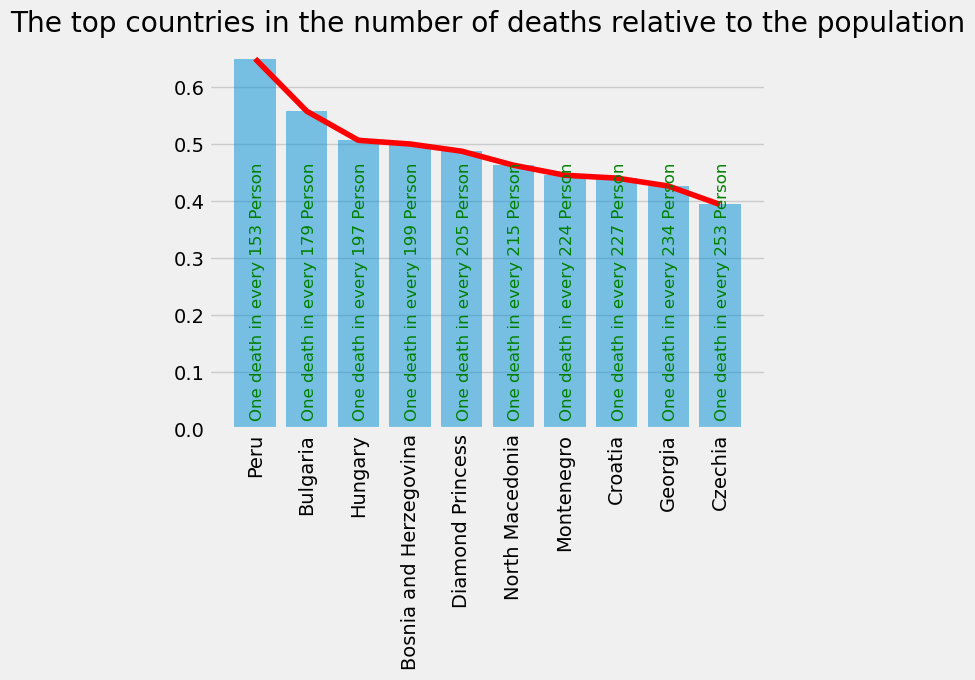

Country  Total Cases  Total Deaths  Total Recovered  \
34                     Peru    4481621.0      218931.0        4258688.0   
58                 Bulgaria    1295426.0       38179.0        1254491.0   
45                  Hungary    2192447.0       48677.0        2139857.0   
96   Bosnia and Herzegovina     401384.0       16255.0         379084.0   
226        Diamond Princess        712.0          13.0            699.0   
98          North Macedonia     346428.0        9638.0         336623.0   
104              Montenegro     286355.0        2797.0         283210.0   
60                  Croatia    1267580.0       17877.0        1249168.0   
49                  Georgia    1814180.0       16926.0        1776548.0   
32                  Czechia    4590019.0       42312.0        4538304.0   

     Active Cases  Total Test  Population  percent Death Population  
34         4002.0  37754603.0  33684208.0                  0.649951  
58         2756.0  10987749.0   6844597.0                  0.557798  
45         3913.0  11394556.0   9606259.0                  0.506722  
96         6045.0   1884721.0   3249317.0                  0.500259  
226           0.0         0.0      2666.0                  0.487622  
98          167.0   2216193.0   2081304.0                  0.463075  
104         348.0   2697814.0    627950.0                  0.445418  
60          535.0   5476183.0   4059286.0                  0.440398  
49        20706.0  16920079.0   3968738.0                  0.426483  
32         9403.0  56893223.0  10736784.0                  0.394084

In [17]:
%matplotlib inline
top_ten_in_percDeathsPop=covid.sort_values('percent Death Population',ascending=False).head(10)
top_deaths_per_population=top_ten_in_percDeathsPop['Population']//top_ten_in_percDeathsPop['Total Deaths']
style.use('fivethirtyeight')
plt.bar(top_ten_in_percDeathsPop['Country'],top_ten_in_percDeathsPop['percent Death Population'],alpha=0.5)
plt.xticks(rotation=90)
plt.grid(visible=False,axis='x')
plt.plot(top_ten_in_percDeathsPop['Country'],top_ten_in_percDeathsPop['percent Death Population'],color='red')
plt.text(-0.1,0.02,'One death in every '+str(top_deaths_per_population.iloc[0].astype(int))+' Person',color='green',size=12,rotation=90)
plt.text(0.9,0.02,'One death in every '+str(top_deaths_per_population.iloc[1].astype(int))+' Person',color='green',size=12,rotation=90)
plt.text(1.9,0.02,'One death in every '+str(top_deaths_per_population.iloc[2].astype(int))+' Person',color='green',size=12,rotation=90)
plt.text(2.9,0.02,'One death in every '+str(top_deaths_per_population.iloc[3].astype(int))+' Person',color='green',size=12,rotation=90)
plt.text(3.9,0.02,'One death in every '+str(top_deaths_per_population.iloc[4].astype(int))+' Person',color='green',size=12,rotation=90)
plt.text(4.9,0.02,'One death in every '+str(top_deaths_per_population.iloc[5].astype(int))+' Person',color='green',size=12,rotation=90)
plt.text(5.9,0.02,'One death in every '+str(top_deaths_per_population.iloc[6].astype(int))+' Person',color='green',size=12,rotation=90)
plt.text(6.9,0.02,'One death in every '+str(top_deaths_per_population.iloc[7].astype(int))+' Person',color='green',size=12,rotation=90)
plt.text(7.9,0.02,'One death in every '+str(top_deaths_per_population.iloc[8].astype(int))+' Person',color='green',size=12,rotation=90)
plt.text(8.9,0.02,'One death in every '+str(top_deaths_per_population.iloc[9].astype(int))+' Person',color='green',size=12,rotation=90)
plt.title('The top countries in the number of deaths relative to the population')
plt.show()
top_ten_in_percDeathsPop

In [18]:
covid['percent Recovered Of Total Cases']=100*covid['Total Recovered']/covid['Total Cases']
covid.head()

Country  Total Cases  Total Deaths  Total Recovered  Active Cases  \
0      USA  104196861.0     1132935.0      101322779.0     1741147.0   
1    India   44682784.0      530740.0       44150289.0        1755.0   
2   France   39524311.0      164233.0       39264546.0       95532.0   
3  Germany   37779833.0      165711.0       37398100.0      216022.0   
4   Brazil   36824580.0      697074.0       35919372.0      208134.0   

     Total Test    Population  percent Death Population  \
0  1.159833e+09  3.348053e+08                  0.338386   
1  9.152658e+08  1.406632e+09                  0.037731   
2  2.714902e+08  6.558452e+07                  0.250414   
3  1.223324e+08  8.388360e+07                  0.197549   
4  6.377617e+07  2.153536e+08                  0.323688   

   percent Recovered Of Total Cases  
0                         97.241681  
1                         98.808277  
2                         99.342772  
3                         98.989585  
4                         97.541838

## Worst 10 countries in number of recoveries relative to population

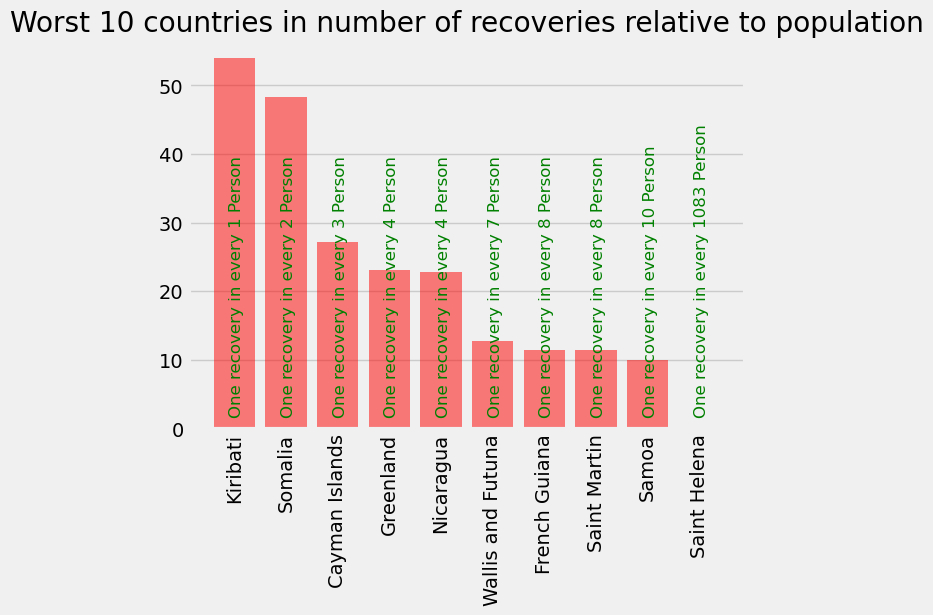

Country  Total Cases  Total Deaths  Total Recovered  \
215           Kiribati       5008.0          18.0           2703.0   
170            Somalia      27318.0        1361.0          13182.0   
167     Cayman Islands      31472.0          37.0           8553.0   
195          Greenland      11971.0          21.0           2761.0   
181          Nicaragua      18491.0         225.0           4225.0   
220  Wallis and Futuna       3427.0           7.0            438.0   
131      French Guiana      98028.0         420.0          11254.0   
193       Saint Martin      12233.0          63.0           1399.0   
186              Samoa      16087.0          29.0           1605.0   
222       Saint Helena       2166.0           0.0              2.0   

     Active Cases  Total Test  Population  percent Death Population  \
215        2287.0         0.0    123419.0                  0.014584   
170       12775.0    400466.0  16841795.0                  0.008081   
167       22882.0    222773.0     67277.0                  0.054997   
195        9189.0    164926.0     56973.0                  0.036860   
181       14041.0         0.0   6779100.0                  0.003319   
220        2982.0     20508.0     10982.0                  0.063741   
131       86354.0    651257.0    314169.0                  0.133686   
193       10771.0    112382.0     39730.0                  0.158570   
186       14453.0    187397.0    202239.0                  0.014339   
222        2164.0         0.0      6115.0                  0.000000   

     percent Recovered Of Total Cases  
215                         53.973642  
170                         48.253899  
167                         27.176538  
195                         23.064072  
181                         22.848954  
220                         12.780858  
131                         11.480393  
193                         11.436279  
186                          9.977000  
222                          0.092336

In [19]:
worst_ten_in_percRecoverCases=covid.sort_values('percent Recovered Of Total Cases',ascending=False).tail(10)
worst_recover_per_cases=worst_ten_in_percRecoverCases['Total Cases']//worst_ten_in_percRecoverCases['Total Recovered']
style.use('fivethirtyeight')
plt.bar(worst_ten_in_percRecoverCases['Country'],worst_ten_in_percRecoverCases['percent Recovered Of Total Cases'],color='red',alpha=0.5)
# plt.ylim(99.6,100)
plt.xticks(rotation=90)
plt.grid(visible=False,axis='x')
plt.text(-0.1,2,'One recovery in every '+str(worst_recover_per_cases.iloc[0].astype(int))+' Person',color='green',size=12,rotation=90)
plt.text(0.9,2,'One recovery in every '+str(worst_recover_per_cases.iloc[1].astype(int))+' Person',color='green',size=12,rotation=90)
plt.text(1.9,2,'One recovery in every '+str(worst_recover_per_cases.iloc[2].astype(int))+' Person',color='green',size=12,rotation=90)
plt.text(2.9,2,'One recovery in every '+str(worst_recover_per_cases.iloc[3].astype(int))+' Person',color='green',size=12,rotation=90)
plt.text(3.9,2,'One recovery in every '+str(worst_recover_per_cases.iloc[4].astype(int))+' Person',color='green',size=12,rotation=90)
plt.text(4.9,2,'One recovery in every '+str(worst_recover_per_cases.iloc[5].astype(int))+' Person',color='green',size=12,rotation=90)
plt.text(5.9,2,'One recovery in every '+str(worst_recover_per_cases.iloc[6].astype(int))+' Person',color='green',size=12,rotation=90)
plt.text(6.9,2,'One recovery in every '+str(worst_recover_per_cases.iloc[7].astype(int))+' Person',color='green',size=12,rotation=90)
plt.text(7.9,2,'One recovery in every '+str(worst_recover_per_cases.iloc[8].astype(int))+' Person',color='green',size=12,rotation=90)
plt.text(8.9,2,'One recovery in every '+str(worst_recover_per_cases.iloc[9].astype(int))+' Person',color='green',size=12,rotation=90)
plt.title('Worst 10 countries in number of recoveries relative to population')
plt.show()
worst_ten_in_percRecoverCases
# top_recovewr_per_cases